#Group 2 - Dataminds - Final Project Stage 1

In [7]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
# Import data
df = pd.read_csv("Training Data.csv")

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
# Pengelompokan
cats = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

In [11]:
# Cek kolom yang mempunyai row kosong
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [12]:
# mengecek data duplikat
df.duplicated().sum()

0

In [13]:
# memunculkan kolom STATE
a = df['STATE'].unique()

print(a)

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


In [14]:
# mengganti nama Uttar_Pradesh[5] menjadi Uttar_Pradesh
df['STATE'] = df['STATE'].str.replace(r'Uttar_Pradesh\[\d+\]','Uttar_Pradesh', regex=True)

print(df['STATE'].unique())

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']


Dalam kolom State terdapat data yang memiliki nilai kategori yang kurang sesuai, yaitu Uttar_Pradesh[5] dan Uttar_Pradesh. Keduanya sebenarnya menggambarkan hal yang sama, namun ditulis dalam format yang berbeda. Untuk memastikan konsistensi data, nilai Uttar_Pradesh[5] diubah menjadi Uttar_Pradesh.

## Handling outlier

In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    low_limit = Q1 - 1.5 * IQR
    high_limit = Q3 + 1.5 * IQR

    # Menandai outlier
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

# Hasil
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')


Jumlah baris sebelum memfilter outlier: 252000
Jumlah baris setelah memfilter outlier: 252000


## EDA


### Univariate Analisis

General Overview

In [16]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,28,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,29143,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


####Numerical Feature

Descriptive statistics for Income:
count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64


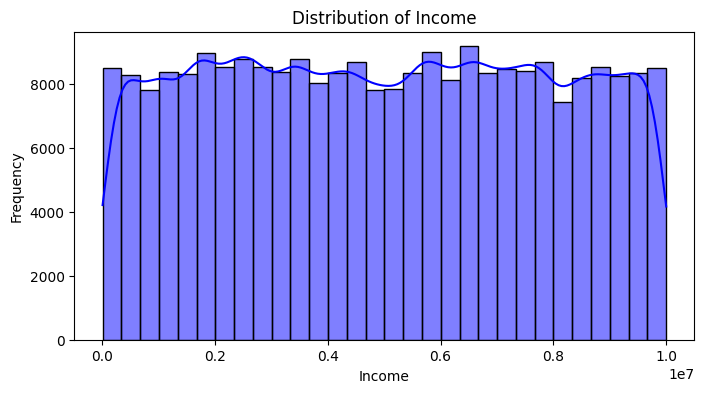

In [17]:
# Analysis of Income
print('Descriptive statistics for Income:')
print(df['Income'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for Age:
count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64


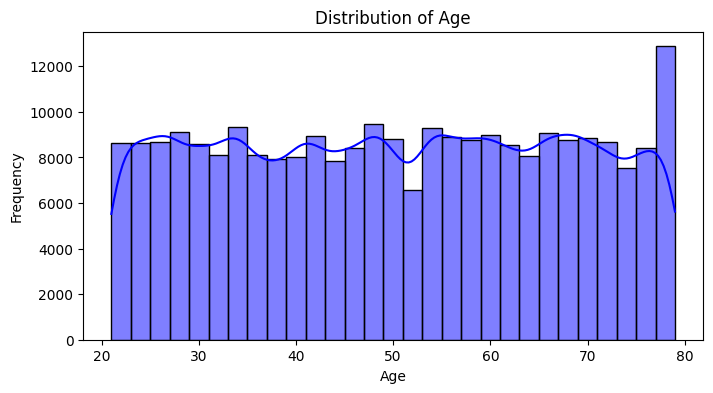

In [18]:
# Analysis of Age
print('Descriptive statistics for Age:')
print(df['Age'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=29, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for Experience:
count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64


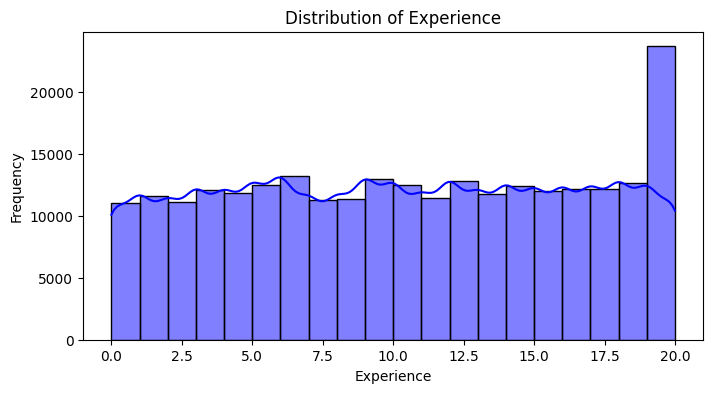

In [19]:
# Analysis of Experience
print('Descriptive statistics for Experience:')
print(df['Experience'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Experience'], kde=True, bins=20, color='blue')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_JOB_YRS:
count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64


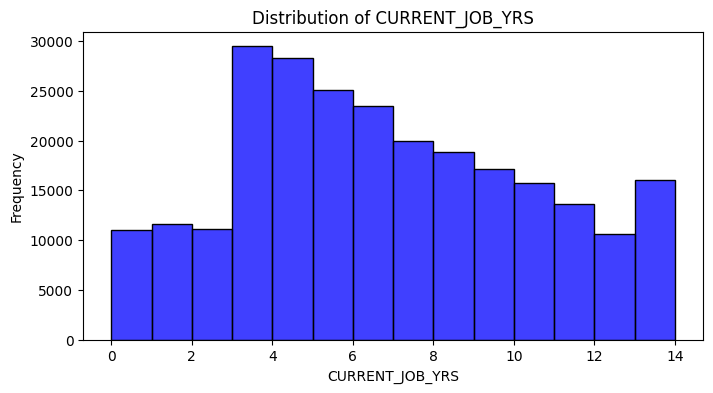

In [20]:
# Analysis of CURRENT_JOB_YRS
print('Descriptive statistics for CURRENT_JOB_YRS:')
print(df['CURRENT_JOB_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['CURRENT_JOB_YRS'], bins=14, color='blue')
plt.title('Distribution of CURRENT_JOB_YRS')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_HOUSE_YRS:
count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64


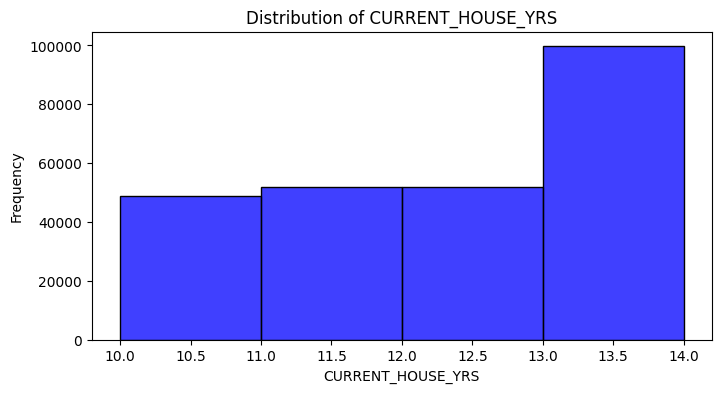

In [21]:
# Analysis of CURRENT_HOUSE_YRS
print('Descriptive statistics for CURRENT_HOUSE_YRS:')
print(df['CURRENT_HOUSE_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['CURRENT_HOUSE_YRS'], bins=4, color='blue')
plt.title('Distribution of CURRENT_HOUSE_YRS')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.show()

####Categorical Feature

Descriptive statistics for Risk_Flag:
count    252000.000000
mean          0.123000
std           0.328438
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk_Flag, dtype: float64


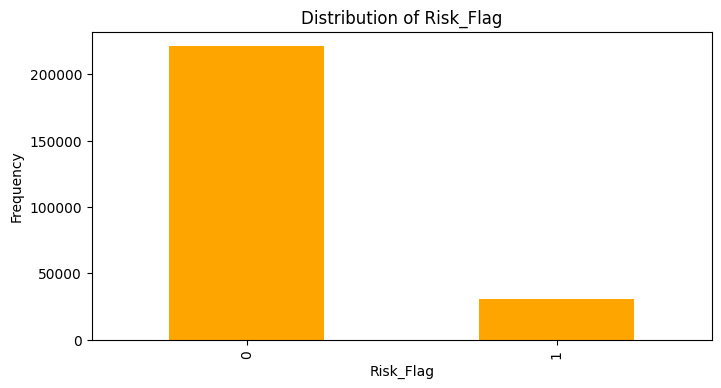

In [22]:
df = df[df['Risk_Flag'].notna()]
# Ensure Risk_Flag is binary and of type int
df['Risk_Flag'] = df['Risk_Flag'].astype(int)

# Descriptive statistics for Risk_Flag
print('Descriptive statistics for Risk_Flag:')
print(df['Risk_Flag'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
df['Risk_Flag'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Frequency')
plt.show()


Frequency distribution for Married/Single:
Married/Single
single     226272
married     25728
Name: count, dtype: int64


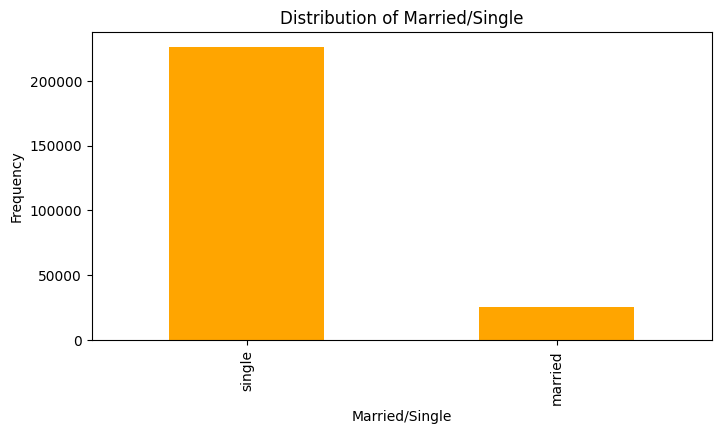

In [23]:
# Analysis of Married/Single
print('Frequency distribution for Married/Single:')
print(df['Married/Single'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Married/Single'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Married/Single')
plt.xlabel('Married/Single')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for House_Ownership:
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


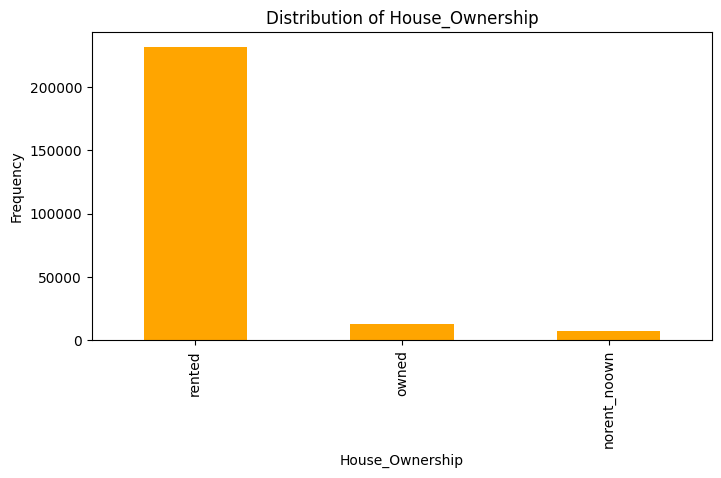

In [24]:
# Analysis of House_Ownership
print('Frequency distribution for House_Ownership:')
print(df['House_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['House_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of House_Ownership')
plt.xlabel('House_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Car_Ownership:
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


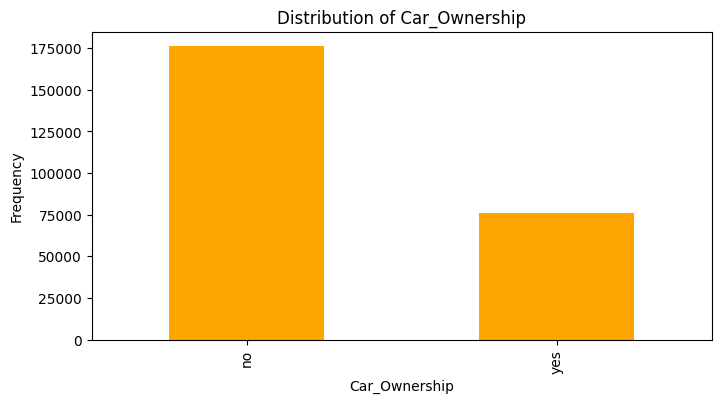

In [25]:
# Analysis of Car_Ownership
print('Frequency distribution for Car_Ownership:')
print(df['Car_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Car_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Car_Ownership')
plt.xlabel('Car_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Profession:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artis

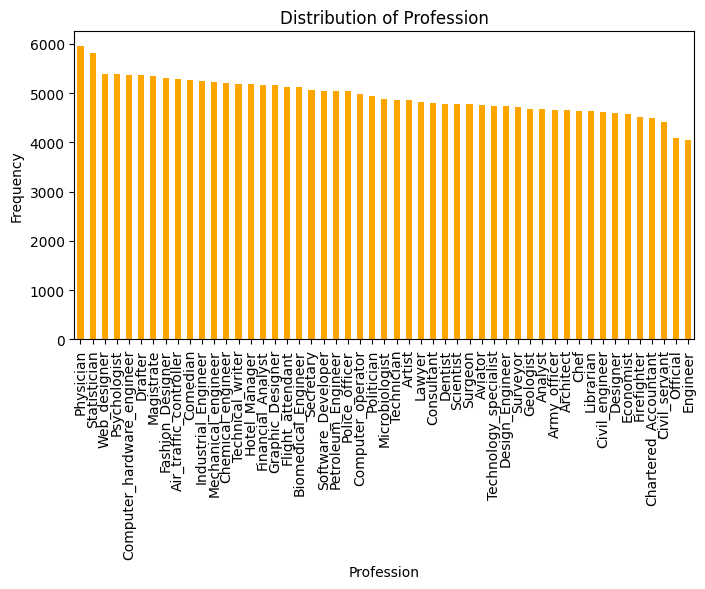

In [26]:
# Analysis of Profession
print('Frequency distribution for Profession:')
print(df['Profession'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Profession'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.show()

Top 10 Professions

Frequency distribution for Top 10 Professions:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Name: count, dtype: int64


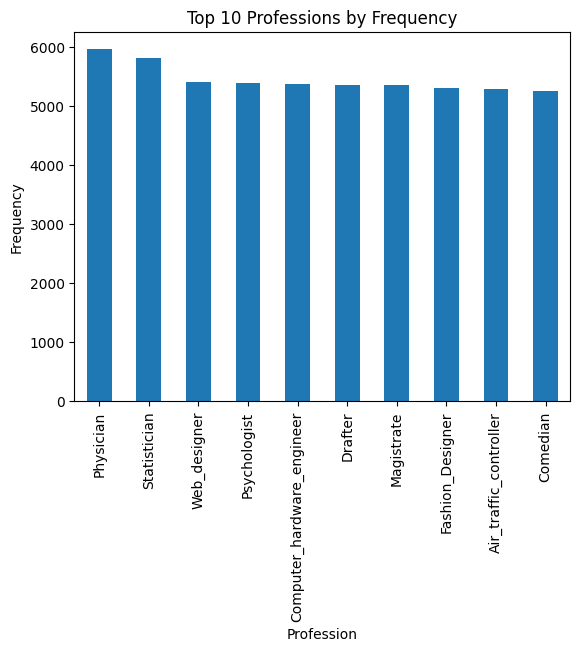

In [32]:
# Analysis of Top 10 Professions
print('Frequency distribution for Top 10 Professions:')
top_10_professions = df['Profession'].value_counts().head(10)
print(top_10_professions)

# Plot bar
plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions by Frequency')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Frequency distribution for CITY:
CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64


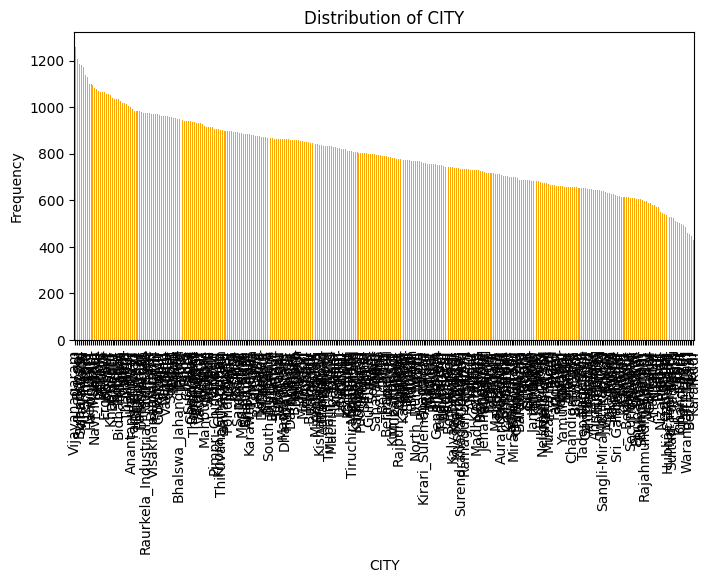

In [33]:
# Analysis of CITY
print('Frequency distribution for CITY:')
print(df['CITY'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['CITY'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of CITY')
plt.xlabel('CITY')
plt.ylabel('Frequency')
plt.show()

Top 10 City

Frequency distribution for Top 10 Cities:
CITY
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa[29]      1180
Vijayawada       1172
Srinagar         1136
Indore           1130
New_Delhi        1098
Hajipur[31]      1098
Satara           1096
Name: count, dtype: int64


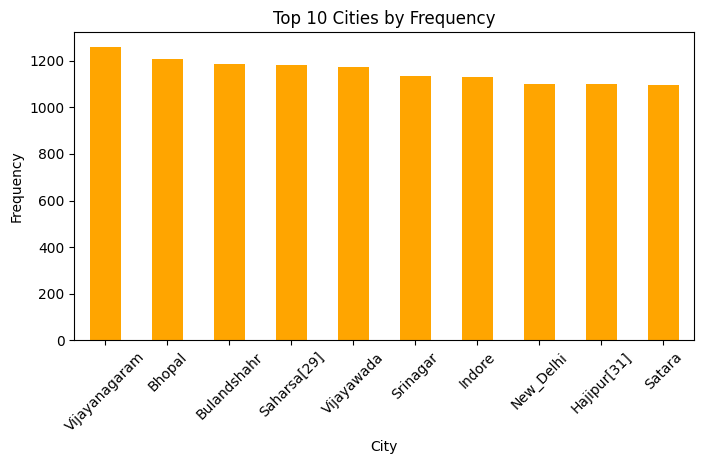

In [34]:
# Analysis of Top 10 Cities
print('Frequency distribution for Top 10 Cities:')
top_10_cities = df['CITY'].value_counts().head(10)
print(top_10_cities)

# Plot bar
plt.figure(figsize=(8, 4))
top_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency distribution for STATE:
STATE
Uttar_Pradesh        29143
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


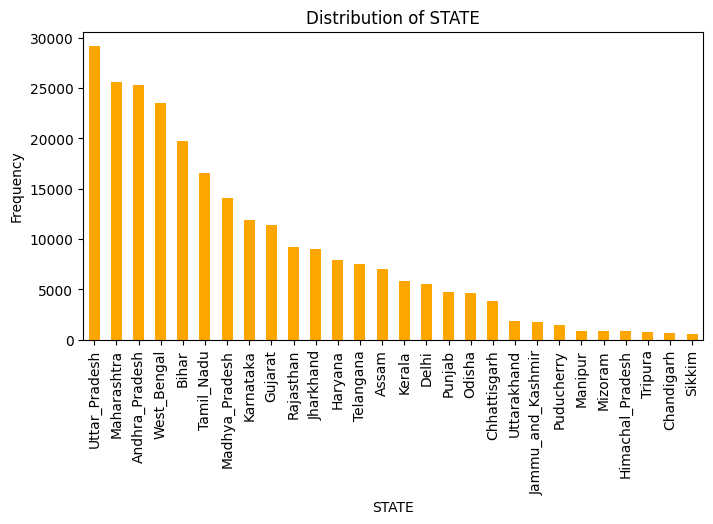

In [35]:
# Analysis of STATE
print('Frequency distribution for STATE:')
print(df['STATE'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['STATE'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of STATE')
plt.xlabel('STATE')
plt.ylabel('Frequency')
plt.show()

### Multivariate analisis

#### Numerical vs Risk_Flag

<Axes: >

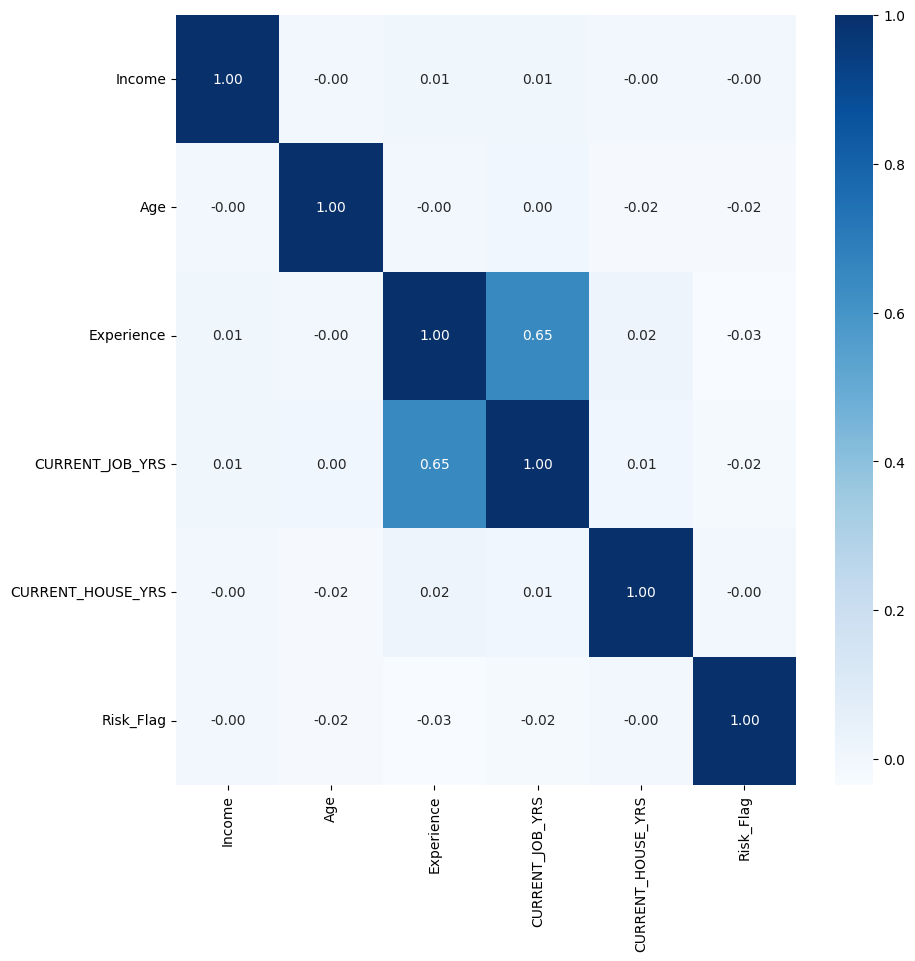

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

#### Categorical vs Risk_Flag

<Axes: xlabel='Risk_Flag', ylabel='count'>

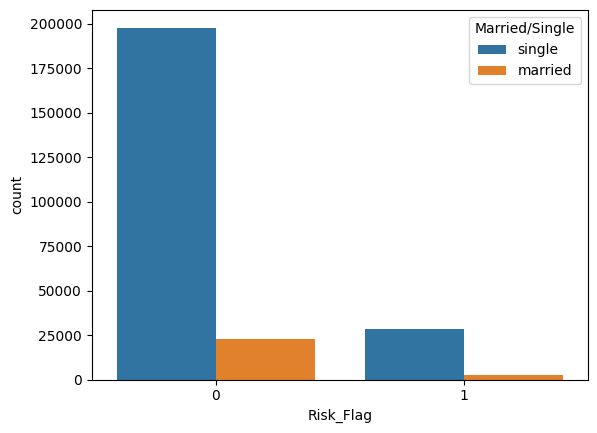

In [37]:
sns.countplot(data=df, x='Risk_Flag', hue='Married/Single')

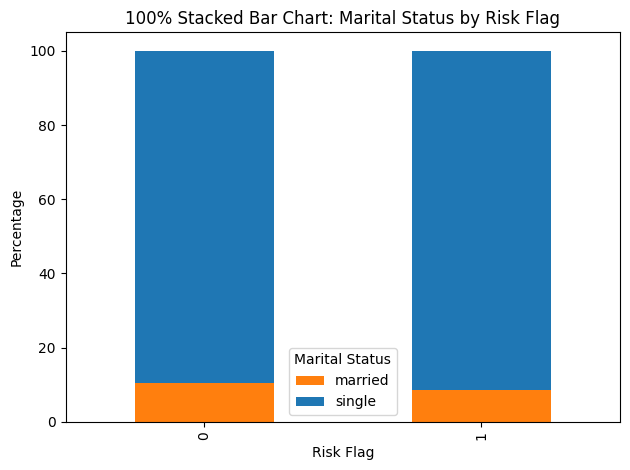

In [39]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Married/Single', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Marital Status by Risk Flag')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

<Axes: xlabel='Risk_Flag', ylabel='count'>

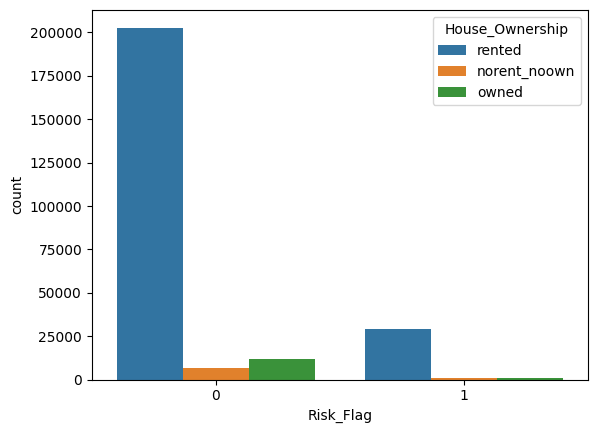

In [20]:
sns.countplot(data=df, x='Risk_Flag', hue='House_Ownership')

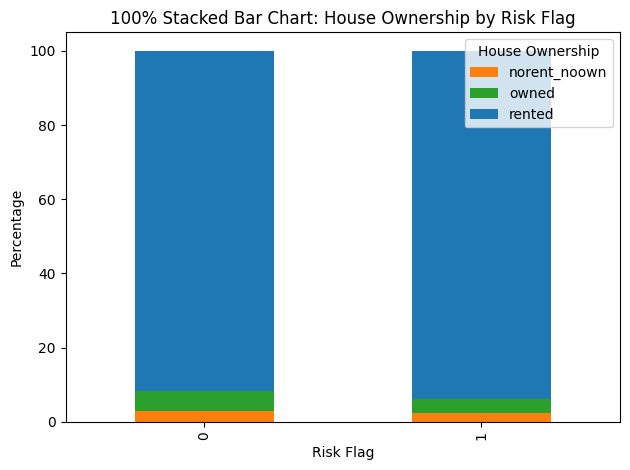

In [40]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='House_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c','#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: House Ownership by Risk Flag')
plt.legend(title='House Ownership')
plt.tight_layout()
plt.show()

<Axes: xlabel='Risk_Flag', ylabel='count'>

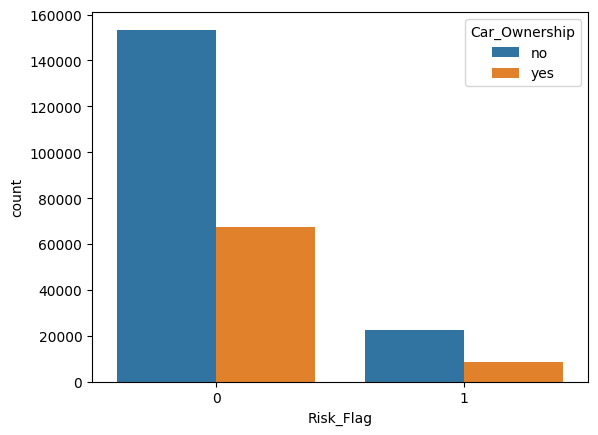

In [41]:
sns.countplot(data=df, x='Risk_Flag', hue='Car_Ownership')

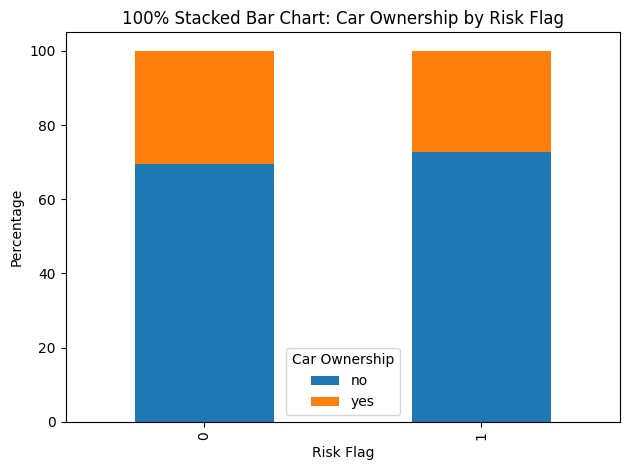

In [43]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Car_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#1f77b4','#ff7f0e'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Car Ownership by Risk Flag')
plt.legend(title='Car Ownership')
plt.tight_layout()
plt.show()

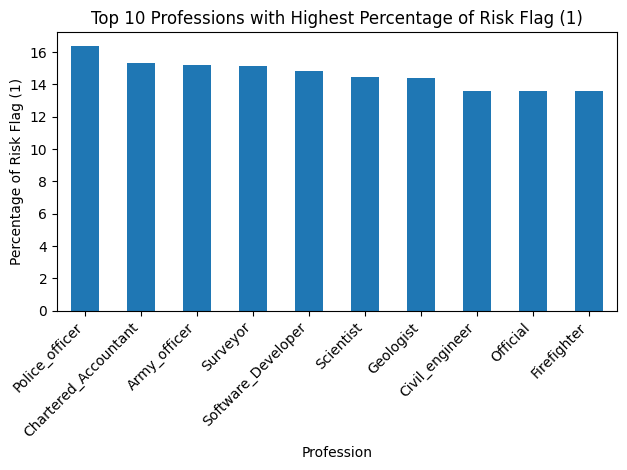

In [44]:
profession_risk = df.groupby('Profession')['Risk_Flag'].mean() * 100

# Get the top 10 professions by highest risk_flag percentage
top_10_professions = profession_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions with Highest Percentage of Risk Flag (1)')
plt.xlabel('Profession')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

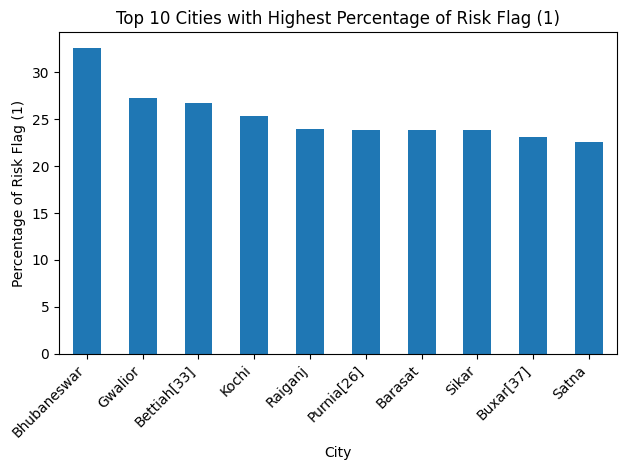

In [45]:
city_risk = df.groupby('CITY')['Risk_Flag'].mean() * 100

# Get the top 10 cities by highest risk_flag percentage
top_10_city = city_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_city.plot(kind='bar')
plt.title('Top 10 Cities with Highest Percentage of Risk Flag (1)')
plt.xlabel('City')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

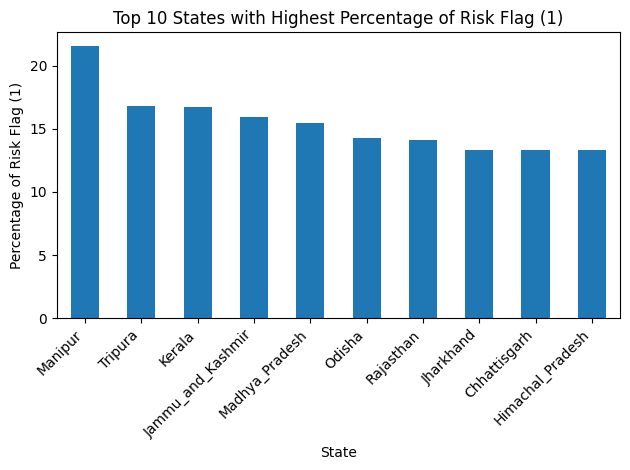

In [46]:
state_risk = df.groupby('STATE')['Risk_Flag'].mean() * 100

# Get the top 10 states by highest risk_flag percentage
top_10_state = state_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_state.plot(kind='bar')
plt.title('Top 10 States with Highest Percentage of Risk Flag (1)')
plt.xlabel('State')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Business Insight

Berikut Merupakan beberapa business insight dari hasil EDA diatas:
1. Profil Pendapatan Peminjam
*   Rata-rata pendapatan peminjam adalah sekitar 5 Juta Rupee per bulan, dengan rentang dari 10 Juta Rupee hinggan hampir 1 miliar per tahun.
*   Peminjam dengan pendapatan lebih tinggi cenderung mampu untuk membayar pinjaman
2.   Usia dan Pengalaman Kerja
*   Usia rata-rata adalah 50 tahun, dengan pengalaman kerja rata-rata 10 tahun.
*   Usia dan pengalaman kerja yang lebih tinggi menunjukkan stabilitas keuangan, meskipun usia lanjut bisa juga menambah risiko jika pembayaran dilakukan dalam jangka panjang.
3. Kepemilikan Aset
*   Sebagian besar peminjam tidak memiliki rumah sendiri (menyewa) dan tidak memiliki kendaraan pribadi.
*   Peminjam tanpa aset fisik seperti rumah atau mobil dianggap memiliki risiko lebih tinggi karena tidak memiliki jaminan jika terjadi gagal bayar.
4. Status Pernikahan
*   Mayoritas peminjam berstatus single. Ini berarti sebagian besar dari mereka tidak memiliki tanggungan keluarga, yang bisa mempengaruhi kemampuan mereka dalam mengelola keuangan.
5. Risiko Kredit
*   Sekitar 12,3% calon peminjam dalam kategori risiko tinggi, yang berpotensi mengalami kesulitan dalam melunasi pinjaman.
*   Identifikasi calon peminjam ini sangat penting untuk meminimalkan risiko gagal bayar.

## Business Recommendation

1. Gunakan Teknologi Prediksi untuk Penilaian Risiko
*   Buat model machine learning untuk menilai risiko calon peminjam berdasarkan faktor-faktor seperti pendapatan, usia, kepemilikan aset, status pernikahan dan lokasi.
*   Model ini dapat membantu perusahaan menyaring calon peminjam dan menghindari pemberian kredit kepada mereka yang berisiko tinggi.
2. Segmentasi Calon Peminjam
*   Kelompok Risiko Rendah: berikan penawaran bungan rendah untuk menarik lebih banyak peminjam yang stabil.
*   Kelompok Risiko Tinggi: Terapkan syarat tambahan, seperti meminta agunan.
3. Strategi Berdasarkan Lokasi
*   Analisis lebih mendalam terhadap kota atau wilayah dengan konsentrasi risiko tinggi untuk memahami pola geografis riisko.
*   Fokuskan promosi di wilayah yang menunjukkan stabilitas keuangan lebih baik.
4. Monitoring Data dan Kualitas Informasi
*   Pastikan data calon peminjam lengkap dan akurat, terutama pada kolom seperti kepemilikan rumah, kendaraan, atau informasi pengalaman kerja dan pendapatan.
*   Dengan data yang lebih berkualitas, model prediksi akan memberikan hasil lebih akurat.
5. Berdasarkan heatmap ternyata kolom "Experience" dan "Current_Job_Yrs" mempunyai hubungan yang kuat, salah satu dari kolomnya harus di drop untuk menghindari multikolinearitas.







